## Into DeepTrain
DeepTrain requires only (1) a compiled model and (2) data directory to run.<br>
This example covers these and a bit more to keep truer to standard use.    

In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(0, str(Path(Path.cwd()).parent))
sys.path.insert(0, os.path.join(Path(Path.cwd()).parents[1], "see-rnn"))

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.models import Model
from deeptrain import TrainGenerator, DataGenerator

Using TensorFlow backend.


### Model maker
Begin by defining a model maker function. Input should specify hyperparameters, optimizer, learning rate, etc;<br> this is the "blueprint" which is later saved.

In [2]:
def make_model(batch_shape, optimizer, loss, metrics, num_classes,
               filters, kernel_size):
    ipt = Input(batch_shape=batch_shape)

    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(ipt)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(num_classes)(x)

    out = Activation('softmax')(x)

    model = Model(ipt, out)
    model.compile(optimizer, loss, metrics=metrics)
    return model

### Model configs
Define configs dictionary to feed as `**kwargs` to `make_model`; we'll also pass it to TrainGenerator,<br>
which will save it and show in a "report" for easy reference

In [3]:
batch_size = 128
width, height, channels = 28, 28, 1  # MNIST dims (28 x 28 pixels, greyscale)

MODEL_CFG = dict(
    batch_shape=(batch_size, width, height, channels),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam',
    num_classes=10,
    filters=16,
    kernel_size=(3, 3),
)

### DataGenerator (train) configs
- `data_path`:    directory where image data is located
- `labels_path`: where labels file is located
- `batch_size`:  number of samples to feed at once to model
- `shuffle`:     whether to shuffle data at end of each epoch
- `superbatch_set_nums`: which files to load into a `superbatch`, which holds batches persisently in memory <br> 
  (as opposed to `batch`, which is overwritten after use). Since MNIST is small, we can load it all into RAM.

In [4]:
datadir = os.path.join("dir", "data", "image")
DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'train'),
    labels_path=os.path.join(datadir, 'train', 'labels.h5'),
    batch_size=batch_size,
    shuffle=True,
    superbatch_set_nums='all',
)

### DataGenerator (validation) configs

In [5]:
VAL_DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'val'),
    labels_path=os.path.join(datadir, 'val', 'labels.h5'),
    batch_size=batch_size,
    shuffle=False,
    superbatch_set_nums='all',
)

### TrainGenerator configs
-   `epochs`:   number of epochs to train for
-   `logs_dir`: where to save TrainGenerator state, model, report, and history
-   `best_models_dir`: where to save model when it achieves new best validation performance
-   `model_configs`: model configurations dict to save & write to report

In [6]:
TRAINGEN_CFG = dict(
    epochs=3,
    logs_dir=os.path.join('dir', 'outputs', 'logs'),
    best_models_dir=os.path.join('dir', 'outputs', 'models'),
    model_configs=MODEL_CFG,
)

### Create training objects

In [7]:
model       = make_model(**MODEL_CFG)
datagen     = DataGenerator(**DATAGEN_CFG)
val_datagen = DataGenerator(**VAL_DATAGEN_CFG)
traingen    = TrainGenerator(model, datagen, val_datagen, **TRAINGEN_CFG)

Discovered 50 files with matching format
Discovered dataset with matching format
50 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Preloading superbatch ... Discovered 50 files with matching format
.................................................. finished, w/ 6400 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): dir\outputs\logs\M20__model-adam__min999.000


### Train


Fitting set 1...   (Loss, Acc) = (2.370597, 0.132812) 
Fitting set 2...   (Loss, Acc) = (2.343825, 0.144531) 
Fitting set 3...   (Loss, Acc) = (2.311301, 0.140625) 
Fitting set 4...   (Loss, Acc) = (2.287057, 0.142578) 
Fitting set 5...   (Loss, Acc) = (2.252726, 0.171875) 
Fitting set 6...   (Loss, Acc) = (2.226725, 0.197917) 
Fitting set 7...   (Loss, Acc) = (2.205358, 0.214286) 
Fitting set 8...   (Loss, Acc) = (2.180504, 0.243164) 
Fitting set 9...   (Loss, Acc) = (2.157950, 0.263889) 
Fitting set 10...  (Loss, Acc) = (2.135839, 0.290625) 
Fitting set 11...  (Loss, Acc) = (2.105779, 0.325284) 
Fitting set 12...  (Loss, Acc) = (2.082644, 0.347005) 
Fitting set 13...  (Loss, Acc) = (2.061819, 0.362380) 
Fitting set 14...  (Loss, Acc) = (2.036526, 0.388393) 
Fitting set 15...  (Loss, Acc) = (2.011799, 0.412500) 
Fitting set 16...  (Loss, Acc) = (1.988976, 0.430176) 
Fitting set 17...  (Loss, Acc) = (1.964768, 0.448989) 
Fitting set 18...  (Loss, Acc) = (1.943171, 0.461806) 
Fitting s

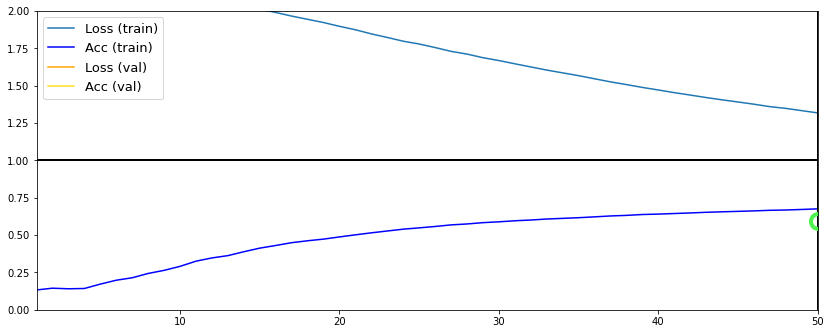


Fitting set 45...  (Loss, Acc) = (0.633496, 0.843750) 
Fitting set 31...  (Loss, Acc) = (0.608743, 0.843750) 
Fitting set 49...  (Loss, Acc) = (0.589947, 0.854167) 
Fitting set 10...  (Loss, Acc) = (0.586200, 0.849609) 
Fitting set 27...  (Loss, Acc) = (0.573641, 0.853125) 
Fitting set 39...  (Loss, Acc) = (0.565826, 0.856771) 
Fitting set 4...   (Loss, Acc) = (0.569122, 0.856027) 
Fitting set 19...  (Loss, Acc) = (0.574812, 0.855469) 
Fitting set 2...   (Loss, Acc) = (0.562962, 0.857639) 
Fitting set 20...  (Loss, Acc) = (0.557432, 0.860156) 
Fitting set 37...  (Loss, Acc) = (0.546000, 0.862216) 
Fitting set 28...  (Loss, Acc) = (0.553593, 0.860026) 
Fitting set 36...  (Loss, Acc) = (0.548383, 0.860577) 
Fitting set 47...  (Loss, Acc) = (0.542207, 0.861049) 
Fitting set 33...  (Loss, Acc) = (0.542460, 0.859896) 
Fitting set 29...  (Loss, Acc) = (0.535699, 0.861816) 
Fitting set 8...   (Loss, Acc) = (0.528845, 0.863051) 
Fitting set 5...   (Loss, Acc) = (0.523436, 0.863281) 
Fitting s

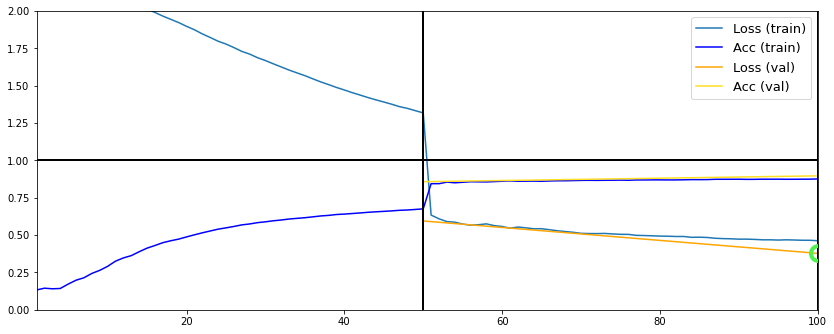


Fitting set 48...  (Loss, Acc) = (0.425716, 0.882812) 
Fitting set 42...  (Loss, Acc) = (0.426509, 0.882812) 
Fitting set 27...  (Loss, Acc) = (0.407297, 0.893229) 
Fitting set 39...  (Loss, Acc) = (0.384832, 0.902344) 
Fitting set 12...  (Loss, Acc) = (0.361690, 0.904687) 
Fitting set 10...  (Loss, Acc) = (0.359165, 0.901042) 
Fitting set 23...  (Loss, Acc) = (0.363716, 0.899554) 
Fitting set 38...  (Loss, Acc) = (0.354195, 0.903320) 
Fitting set 29...  (Loss, Acc) = (0.351775, 0.906250) 
Fitting set 41...  (Loss, Acc) = (0.348022, 0.907813) 
Fitting set 19...  (Loss, Acc) = (0.356801, 0.906960) 
Fitting set 11...  (Loss, Acc) = (0.349731, 0.908203) 
Fitting set 9...   (Loss, Acc) = (0.350933, 0.905048) 
Fitting set 36...  (Loss, Acc) = (0.346999, 0.906250) 
Fitting set 37...  (Loss, Acc) = (0.341569, 0.907813) 
Fitting set 6...   (Loss, Acc) = (0.341348, 0.905762) 
Fitting set 28...  (Loss, Acc) = (0.349923, 0.903033) 
Fitting set 33...  (Loss, Acc) = (0.353286, 0.901042) 
Fitting s

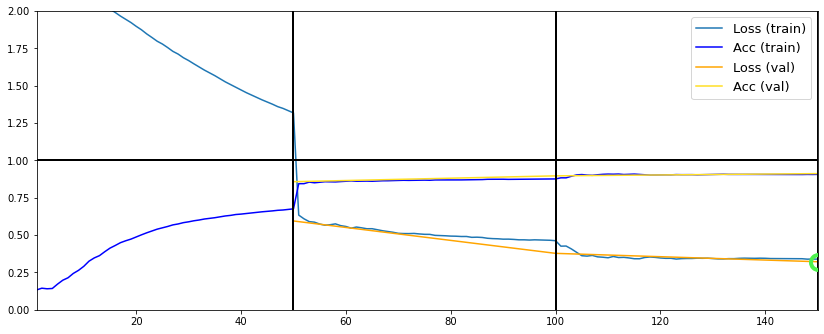

Training has concluded.


In [8]:
traingen.train()

### Delve deeper
DeepTrain offers much beyond the minimals; it's suggested to proceed with the advanced example before
exploring others.